In [9]:
import numpy as np
import seaborn as sns
import os
import pickle
import time
# from matplotlib import pyplot as plt
from pprint import pprint
# import mplpub

In [10]:
# mplpub.setup_style()
font_size = 8

In [11]:
import matplotlib
matplotlib.use('agg')  # generate postscript output by default
import matplotlib.pyplot as plt
from matplotlib import rc

plt.style.use('classic')
plt.set_cmap(plt.cm.viridis)

    # rc('text', usetex=True)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.labelpad'] = 0
plt.rcParams['grid.color'] = 'k'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5

plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['font.size'] = font_size
plt.rcParams['axes.labelsize'] = font_size
plt.rcParams['axes.titlesize'] = font_size
plt.rcParams['xtick.labelsize'] = font_size 
plt.rcParams['ytick.labelsize'] = font_size 
plt.rcParams['legend.fontsize'] = font_size 
plt.rcParams['figure.titlesize'] = font_size
# plt.rcParams['savefig.bbox'] = 'tight' # not compatible with animations
# plt.rcParams['savefig.pad_inches'] : 0.025      # Padding to be used when bbox is set to 'tight'
plt.rcParams['figure.figsize'] = [3.5, 1.2]  # IEEE half column and golden ratio


In [12]:
class Viz:
    def __init__(self, outlier_ddir, mat_dir):
        self.outlier_ddir = outlier_ddir
        self.scratch_dir = mat_dir + os.sep + "scratch"
        self.projects_dir = mat_dir + os.sep + "projects"
        self.home_dir = mat_dir + os.sep + "home"
        self.outliers_db = {}
        self.load_outliers()
    
    def load_outliers(self):
        files = os.listdir(self.outlier_ddir)
        files = [self.outlier_ddir + os.sep + f for f in files]
        for f in files:
            if "fail" in f:
                continue
            data = pickle.load(open(f, 'rb'))
            for d in data:
                if len(data[d]) > 0:
                    for item in data[d]:
                        if data[d][item] < 0.3:
                            if d not in self.outliers_db:
                                self.outliers_db[d] = {}
                            self.outliers_db[d][item] =  data[d][item]
    def disp_outliers(self):
        ordered_keys = sorted(self.outliers_db.keys())
        for d in ordered_keys:
            print(time.ctime(d), d,  self.outliers_db[d])
    
    
    def get_mat_data(self, ts):
        s_db = {}
        p_db = {}
        h_db = {}
        file_ts = ts - 6*3600
        s_db["success"] = pickle.load(open(self.scratch_dir + os.sep + time.strftime("%Y%m%d", time.localtime(file_ts)) + ".success", 'rb'))
        h_db["success"] = pickle.load(open(self.home_dir + os.sep + time.strftime("%Y%m%d", time.localtime(file_ts)) + ".success", 'rb'))
        p_db["success"] = pickle.load(open(self.projects_dir + os.sep + time.strftime("%Y%m%d", time.localtime(file_ts)) + ".success", 'rb'))
        s_db["failed"] = pickle.load(open(self.scratch_dir + os.sep + time.strftime("%Y%m%d", time.localtime(file_ts)) + ".failed", 'rb'))
        h_db["failed"] = pickle.load(open(self.home_dir + os.sep + time.strftime("%Y%m%d", time.localtime(file_ts)) + ".failed", 'rb'))
        p_db["failed"] = pickle.load(open(self.projects_dir + os.sep + time.strftime("%Y%m%d", time.localtime(file_ts)) + ".failed", 'rb'))
        return np.reshape(s_db["success"][ts], (-1, 360)), np.reshape(p_db["success"][ts], (-1, 36)), np.reshape(h_db["success"][ts], (-1, 36))
    
    def gen(self, size, value):
        return np.asarray([value]*size)
        
    def viz_mat_data(self, ts, fname):
        print(time.ctime(ts), len(self.outliers_db[ts]), self.outliers_db[ts])
        s_db = {}
        p_db = {}
        h_db = {}
        file_ts = ts - 6*3600
        s_db["success"] = pickle.load(open(self.scratch_dir + os.sep + time.strftime("%Y%m%d", time.localtime(file_ts)) + ".success", 'rb'))
        h_db["success"] = pickle.load(open(self.home_dir + os.sep + time.strftime("%Y%m%d", time.localtime(file_ts)) + ".success", 'rb'))
        p_db["success"] = pickle.load(open(self.projects_dir + os.sep + time.strftime("%Y%m%d", time.localtime(file_ts)) + ".success", 'rb'))
        s_db["failed"] = pickle.load(open(self.scratch_dir + os.sep + time.strftime("%Y%m%d", time.localtime(file_ts)) + ".failed", 'rb'))
        h_db["failed"] = pickle.load(open(self.home_dir + os.sep + time.strftime("%Y%m%d", time.localtime(file_ts)) + ".failed", 'rb'))
        p_db["failed"] = pickle.load(open(self.projects_dir + os.sep + time.strftime("%Y%m%d", time.localtime(file_ts)) + ".failed", 'rb'))
#         data = np.reshape(s_db["success"][ts], (-1, 360))
#         fig_s_s, ax_s_s = plt.subplots(figsize=(18,4))
#         sns.heatmap(data, fmt="d",linewidths=.5,  ax = ax_s_s)
#         data = np.reshape(s_db["failed"][ts], (-1, 360))
#         fig_s_f, ax_s_f = plt.subplots(figsize=(18,4))
#         sns.heatmap(data, fmt="d",linewidths=.5,  ax = ax_s_f)
        fig_s, ax_s = plt.subplots(1,3)
    
        #data = np.reshape(s_db["failed"][ts]/(s_db["success"][ts] + s_db["failed"][ts]) , (-1, 360))
        data = np.reshape((self.gen(360*5,5)-np.clip(s_db["success"][ts], 0, 5))/self.gen(360*5,5), (-1, 360))
        
        sns.heatmap(data, fmt="d",cmap="Greys",  ax = ax_s[0], vmin=0, vmax=1, cbar=False)
        
        ax_s[0].set_title("Scratch")
#         ax_s[0].set_xlabel("OST")
        ax_s[0].set_ylabel("Client")
        
#         data = np.reshape(h_db["failed"][ts]/(h_db["success"][ts] + h_db["failed"][ts]) , (-1, 36))
        data = np.reshape((self.gen(36*5,5)-np.clip(h_db["success"][ts], 0, 5))/self.gen(36*5,5), (-1, 36))
    
        sns.heatmap(data, fmt="d",cmap="Greys",  ax = ax_s[1], vmin=0, vmax=1, cbar=False)
        
        ax_s[1].set_title("Home")
#         ax_s[1].set_xlabel("OST")
        # ax_s[1].set_ylabel("Client")
        
#         data = np.reshape(p_db["failed"][ts]/(p_db["success"][ts] + p_db["failed"][ts]) , (-1, 36))
        data = np.reshape((self.gen(36*5,5)-np.clip(p_db["success"][ts], 0, 5))/self.gen(36*5,5), (-1, 36))
        ax_s[2].set_title("Projects")
#         ax_s[2].set_xlabel("OST")
        # ax_s[2].set_ylabel("Client")
        
        sns.heatmap(data, fmt="d",cmap="Greys",  ax = ax_s[2], vmin=0, vmax=1, cbar=True)
        
        fig_s.text(0.5, 0.01, 'OST', ha='center',  fontweight='bold')
#         fig_s.text(0.01, 0.5, 'Client', va='center', rotation='vertical')
        fig_s.tight_layout(pad=0.5)
        output = fname
        plt.savefig(output)
        return fig_s
        
#         print(s_db)
#         print(h_db)
#         print(p_db)
        

In [13]:
v = Viz("outliers", "data_mat_500_300/" )

In [17]:
pickle.dump(v.outliers_db, open( "outliers_db.pkl", "wb" ) )

Tue Aug 14 18:55:00 2018 2 {'scratch_ost_208': 0.08, 'projects_mds': 0.0}


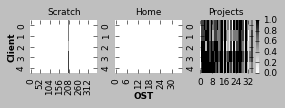

In [15]:
# MDS FIGURE
v.viz_mat_data(1534272900, "mds.pdf")#
# print(v.outliers_db)

Fri Jun 30 15:20:00 2017 1 {'projects_ost_2': 0.0}


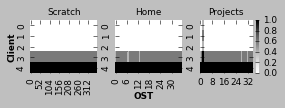

In [17]:
# Gem Net FIGURE
v.viz_mat_data(1498836000, "net.pdf")#
# print(v.outliers_db)

Wed May 17 04:40:00 2017 1 {'client3': 0.0008294525848127358}


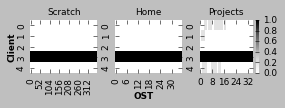

In [7]:
#IB NET
v.viz_mat_data(1494996000, "ibnet.pdf")#

Tue Jan 24 17:55:00 2017 3 {'ib_status': 0.008072004644290783, 'gem_status': 0.008072004644290783, 'scratch_mds': 0.1576843604035618}


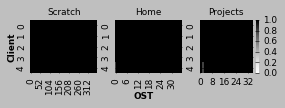

In [8]:
# IB + GEM
v.viz_mat_data(1485280500, "ibgem.pdf")#